In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme();

In [2]:
df = pd.read_csv('tv_shows.csv')
movie = pd.read_csv('movies.csv')
df.drop_duplicates(subset='Title', keep='first', inplace=True)
df.drop(['Unnamed: 0'], inplace=True, axis=1)
movie.drop(['Unnamed: 0'], inplace=True, axis=1)

In [3]:

movie.head()
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16145 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.0+ MB


In [28]:
df = df.dropna()
movie = movie.dropna()
df.head()
movie.head()
print(df.shape, movie.shape)

(925, 10) (3301, 16)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 925 entries, 0 to 5575
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            925 non-null    object 
 1   Year             925 non-null    int64  
 2   Age              925 non-null    object 
 3   IMDb             925 non-null    float64
 4   Rotten Tomatoes  925 non-null    object 
 5   Netflix          925 non-null    int64  
 6   Hulu             925 non-null    int64  
 7   Prime Video      925 non-null    int64  
 8   Disney+          925 non-null    int64  
 9   type             925 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 79.5+ KB


In [6]:
df['Rotten Tomatoes']= df['Rotten Tomatoes'].str.replace('%','').astype('int64')

movie['Rotten Tomatoes']= movie['Rotten Tomatoes'].str.replace('%','').astype('int64')


In [7]:
df['IMDb'] = df['IMDb'] * 10
movie['IMDb'] = movie['IMDb']*10
df['IMDb'] = df['IMDb'].astype('int64')
movie['IMDb'] = movie['IMDb'].astype('int64')

In [8]:

df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,95,96,1,0,0,0,1
1,Stranger Things,2016,16+,88,93,1,0,0,0,1
2,Money Heist,2017,18+,84,91,1,0,0,0,1
3,Sherlock,2010,16+,91,78,1,0,0,0,1
4,Better Call Saul,2015,18+,87,97,1,0,0,0,1


In [9]:
Netflix = df[df['Netflix']==1].reset_index().drop(['index'], axis=1).drop(['Netflix','Hulu','Prime Video', 'Disney+'], axis=1)
Hulu = df[df['Hulu']==1].reset_index().drop(['index'], axis=1).drop(['Netflix','Hulu','Prime Video', 'Disney+'], axis=1)
Prime_Video = df[df['Prime Video']==1].reset_index().drop(['index'], axis=1).drop(['Netflix','Hulu','Prime Video', 'Disney+'], axis=1)
Disney = df[df['Disney+']==1].reset_index().drop(['index'], axis=1).drop(['Netflix','Hulu','Prime Video', 'Disney+'], axis=1)


In [20]:
Netflix_movie = movie[movie['Netflix']==1].reset_index().drop(['index'], axis=1).drop(['Netflix','Hulu','Prime Video', 'Disney+'], axis=1)
Hulu_movie = movie[movie['Hulu']==1].reset_index().drop(['index'], axis=1).drop(['Netflix','Hulu','Prime Video', 'Disney+'], axis=1)
Prime_Video_movie = movie[movie['Prime Video']==1].reset_index().drop(['index'], axis=1).drop(['Netflix','Hulu','Prime Video', 'Disney+'], axis=1)
Disney_movie = movie[movie['Disney+']==1].reset_index().drop(['index'], axis=1).drop(['Netflix','Hulu','Prime Video', 'Disney+'], axis=1)
Disney_movie

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Type,Directors,Genres,Country,Language,Runtime
0,96,Saving Mr. Banks,2013,13+,75,79,0,John Lee Hancock,"Biography,Comedy,Drama","United States,United Kingdom,Australia",English,125.0
1,123,Bolt,2008,7+,68,89,0,"Byron Howard,Chris Williams","Animation,Adventure,Comedy,Drama,Family",United States,English,96.0
2,126,The Princess and the Frog,2009,all,71,85,0,"Ron Clements,John Musker","Animation,Adventure,Comedy,Family,Fantasy,Musi...",United States,"English,French",97.0
3,151,Miracle,2004,7+,75,81,0,Gavin O'Connor,"Biography,Drama,History,Sport","Canada,United States",English,135.0
4,483,White Fang,2018,7+,69,88,0,Randal Kleiser,"Adventure,Drama",United States,English,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...
329,16658,A Kid in King Arthur's Court,1995,7+,47,5,0,Michael Gottlieb,"Adventure,Comedy,Family,Fantasy,Romance","United States,Hungary,United Kingdom",English,89.0
330,16672,George of the Jungle 2,2003,7+,33,17,0,David Grossman,"Adventure,Comedy,Family","United States,Australia",English,87.0
331,16678,That Darn Cat,1997,7+,47,13,0,Robert Stevenson,"Comedy,Crime,Family,Thriller",United States,"English,French",116.0
332,16688,Kazaam,1996,7+,30,6,0,Paul Michael Glaser,"Comedy,Family,Fantasy,Musical",United States,English,93.0


In [10]:
df = df.sort_values(by=['IMDb'], ascending=False)
df
# Year = df.sort_values(by=['Year'], ascending=False)
# Year

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,95,96,1,0,0,0,1
3567,Band of Brothers,2001,18+,94,94,0,0,1,0,1
3566,The Wire,2002,18+,93,94,0,0,1,0,1
91,Our Planet,2019,7+,93,93,1,0,0,0,1
1931,Rick and Morty,2013,18+,92,94,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2692,The Hills,2006,7+,35,52,0,1,1,0,1
2983,I Am Cait,2015,16+,35,86,0,1,0,0,1
2677,The Bachelorette,2003,16+,34,62,0,1,0,0,1
1498,The Goop Lab,2020,18+,23,31,1,0,0,0,1


In [11]:
Disney['StreamingOn'] = 'Disney+'
Netflix['StreamingOn'] = 'Netflix'
Prime_Video['StreamingOn'] = 'Prime Video'
Hulu['StreamingOn'] = 'Hulu'


In [21]:
Disney_movie['StreamingOn'] = 'Disney+'
Netflix_movie['StreamingOn'] = 'Netflix'
Prime_Video_movie['StreamingOn'] = 'Prime Video'
Hulu_movie['StreamingOn'] = 'Hulu'


In [12]:
all_df= Netflix.append([Disney, Hulu, Prime_Video], ignore_index=True).drop(['type'], axis=1)
all_df


,Title,Year,Age,IMDb,Rotten Tomatoes,StreamingOn
0,Breaking Bad,2008,18+,95,96,Netflix
1,Stranger Things,2016,16+,88,93,Netflix
2,Money Heist,2017,18+,84,91,Netflix
3,Sherlock,2010,16+,91,78,Netflix
4,Better Call Saul,2015,18+,87,97,Netflix
...,...,...,...,...,...,...
990,The Simple Life,2003,16+,38,35,Prime Video
991,Flash Gordon,2007,7+,48,15,Prime Video
992,Rebel,2017,16+,52,38,Prime Video
993,"Glenn Martin, DDS",2009,16+,41,36,Prime Video


In [24]:
all_df_movie= Netflix_movie.append([Disney_movie, Hulu_movie, Prime_Video_movie], ignore_index=True).drop(['Type'], axis=1)
all_df_movie

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,StreamingOn
0,1,Inception,2010,13+,88,87,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Netflix
1,2,The Matrix,1999,18+,87,87,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,Netflix
2,3,Avengers: Infinity War,2018,13+,85,84,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,Netflix
3,4,Back to the Future,1985,7+,85,96,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Netflix
4,5,"The Good, the Bad and the Ugly",1966,18+,88,97,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...
3559,14250,Raising Flagg,2006,13+,54,23,Neal Miller,Comedy,United States,English,103.0,Prime Video
3560,14815,"God, Sex & Apple Pie",1998,18+,43,17,Paul Leaf,"Comedy,Drama,Romance",United States,English,97.0,Prime Video
3561,15164,Looking for Palladin,2008,18+,55,22,Andrzej Krakowski,Comedy,United States,English,115.0,Prime Video
3562,15491,Fish Without a Bicycle,2003,18+,38,10,Brian Austin Green,"Comedy,Drama,Romance",United States,English,97.0,Prime Video


In [29]:
hello = all_df.groupby('StreamingOn')['Title'].count()
# hello.columns(['StreamingOn', 'Numbers'])
count = hello.to_frame().reset_index()
hi = all_df_movie.groupby('StreamingOn')['Title'].count()
# hello.columns(['StreamingOn', 'Numbers'])
count_movie = hi.to_frame().reset_index()

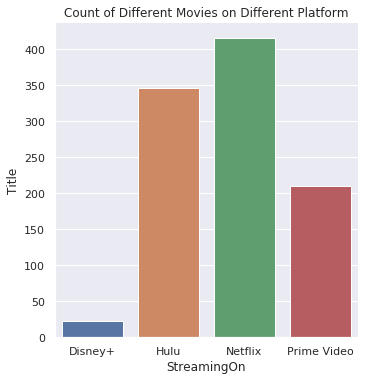

In [99]:
sns.catplot(kind='bar', x='StreamingOn', y='Title', data=count)
plt.title('Count of Different Movies on Different Platform')
plt.show();

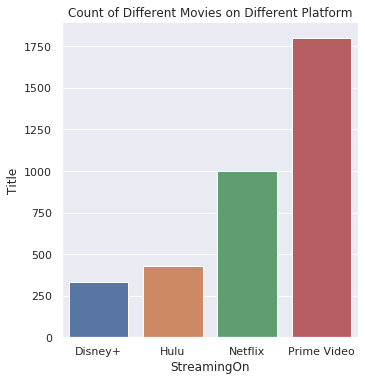

In [100]:
sns.catplot(kind='bar', x='StreamingOn', y='Title', data=count_movie)
plt.title('Count of Different Movies on Different Platform')

plt.show();

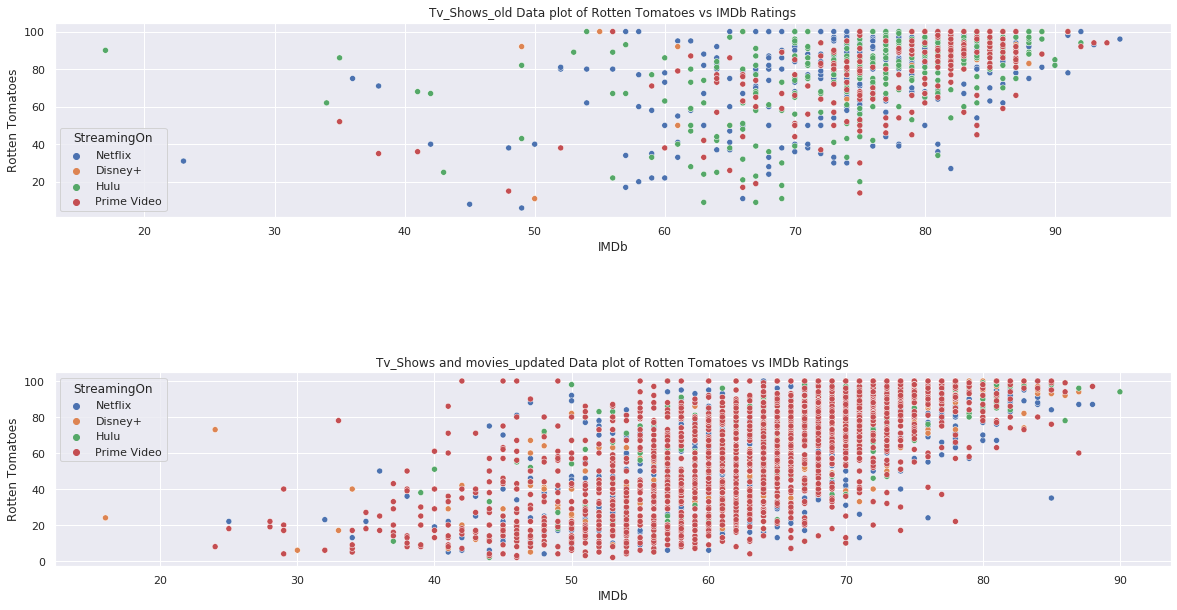

In [38]:
plt.figure(figsize=(20,10))
plt.yticks(np.arange(5, 100, 10))
plt.subplots_adjust(hspace = 0.8)
plt.subplot(2,1,1)
sns.scatterplot(x='IMDb', y='Rotten Tomatoes', data=all_df, hue='StreamingOn');
plt.title('Tv_Shows_old Data plot of Rotten Tomatoes vs IMDb Ratings')
plt.subplot(2,1,2)
sns.scatterplot(x='IMDb', y='Rotten Tomatoes', data=all_df_movie, hue='StreamingOn');
plt.title('\n\nTv_Shows and movies_updated Data plot of Rotten Tomatoes vs IMDb Ratings')
plt.show();


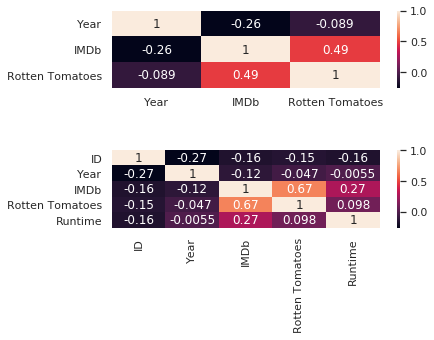

In [43]:
# sns.heatmap(all_df['IMDb'], all_df['Rotten Tomatoes'])
plt.subplots_adjust(hspace = 0.8)

d= all_df['IMDb'].corr(all_df['Rotten Tomatoes'])
plt.subplot(2,1,1)
sns.heatmap(all_df.corr(), annot=True)
plt.subplot(2,1,2)
sns.heatmap(all_df_movie.corr(), annot=True)
plt.show()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

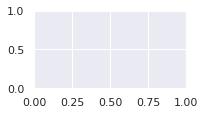

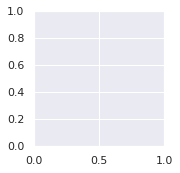

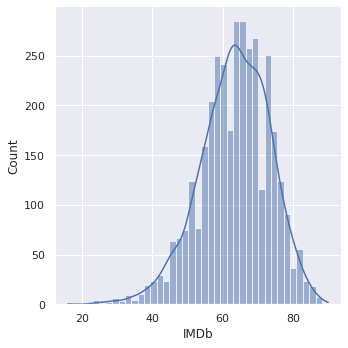

In [73]:
all_df['IMDb'] = all_df['IMDb']
plt.subplots_adjust(hspace = 0.8)
plt.subplot(2,2,1)
sns.displot(all_df_movie['Rotten Tomatoes'], kde=True);
plt.subplot(2,2,2);
sns.displot(all_df_movie['IMDb'], kde=True);
plt.show();

In [110]:

import plotly.express as px
def sunburst(dataframe,platform,c):
    dataframe=dataframe.loc[dataframe[platform] == 1]
    dataframe=dataframe.sort_values(by='IMDb', ascending=False)
    rating = dataframe[0:10]
    fig =px.sunburst(
    rating,
    path=['Title','Genres','Language'],
    values='IMDb',
    color='IMDb',
    color_continuous_scale=c)
    fig.show()



In [111]:
sunburst(movie, 'Netflix', 'amp')

In [87]:
sunburst(movie, 'Hulu', 'dense')

In [104]:
sunburst(movie, 'Prime Video', 'haline')

In [112]:
sunburst(movie, 'Disney+', 'Blugrn')

In [118]:


wow = movie.sort_values(by='IMDb', ascending=False)
ohh = wow[0:10]
ohh['Movies']='Movies'
fig = px.treemap(ohh, path=['Movies','Title', 'Genres','Language'], values='IMDb',color='IMDb',color_continuous_scale='Blugrn')
fig.show()



<ipython-input-118-70dcb2d68f84>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

